# Level 5 Data Engineer Higher Apprenticeship
# Module 6 Topic 3 - APIs

In [22]:
# Import necessary libraries
import requests
import json
import matplotlib.pyplot as plt

In [23]:
# Constants
BASE_URL = "https://api.ratings.food.gov.uk"
AUTHORITIES_ENDPOINT = "/Authorities"
ESTABLISHMENTS_ENDPOINT = "/Establishments"
HEADERS = {'x-api-version': '2', 'Accept': 'application/json'}

In [24]:
def fetch_data(url, params=None):
    """Fetch data from the API using specified URL and parameters."""
    response = requests.get(url, headers=HEADERS, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to fetch data: {response.status_code} - {response.text}")

In [25]:
# Fetch and display authority data
def get_authorities():
    url = f"{BASE_URL}{AUTHORITIES_ENDPOINT}"
    data = fetch_data(url)
    return data['authorities']

In [26]:
# Visualize the number of establishments per authority
def plot_authorities(authorities):
    names = [auth['Name'] for auth in authorities]
    counts = [auth['EstablishmentCount'] for auth in authorities]

    plt.figure(figsize=(10, 8))
    plt.barh(names, counts, color='skyblue')
    plt.xlabel('Number of Establishments')
    plt.ylabel('Local Authority')
    plt.title('Number of Food Establishments per Local Authority')
    plt.gca().invert_yaxis()  # Invert y-axis to show the largest at the top
    plt.show()

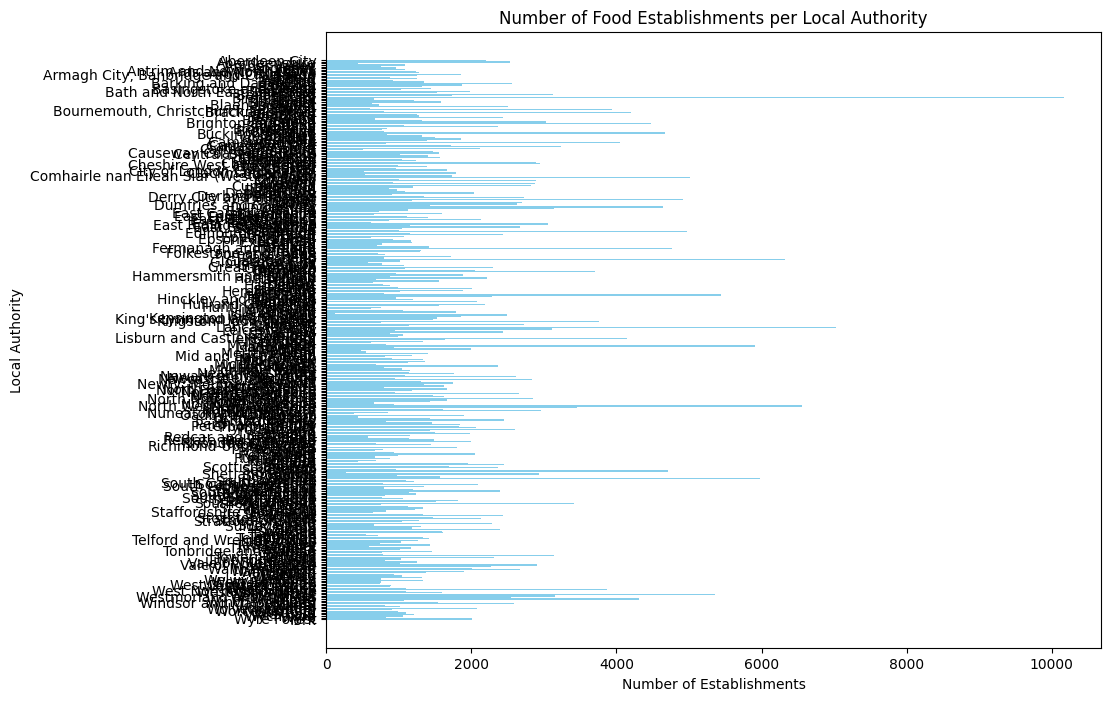

In [27]:
authorities = get_authorities()
plot_authorities(authorities)

In [28]:
# Function to get localAuthorityId for a place in England
def get_authority_id(authority_name):
    authorities = fetch_data(f"{BASE_URL}{AUTHORITIES_ENDPOINT}")['authorities']
    for authority in authorities:
        if authority['Name'].lower() == authority_name.lower():
            return authority['LocalAuthorityId']
    raise ValueError(f"Authority not found: {authority_name}")

In [29]:

# Fetch establishments data by localAuthorityId
def fetch_establishments(local_authority_id):
    params = {'localAuthorityId': local_authority_id}
    return fetch_data(f"{BASE_URL}{ESTABLISHMENTS_ENDPOINT}", params)

In [30]:
# Fetching localAuthorityId for Southampton
southampton_id = get_authority_id("Southampton")
establishments = fetch_establishments(southampton_id)


In [31]:
# Aggregate ratings for establishments
def aggregate_ratings(establishments):
    rating_distribution = {}
    for est in establishments['establishments']:
        rating = est['RatingValue']
        if rating not in rating_distribution:
            rating_distribution[rating] = 0
        rating_distribution[rating] += 1
    return rating_distribution

In [32]:
# Visualize the distribution of food hygiene ratings
def plot_rating_distribution(distribution, title):
    ratings = list(distribution.keys())
    counts = [distribution[rating] for rating in ratings]

    plt.figure(figsize=(10, 6))
    plt.bar(ratings, counts, color='purple')
    plt.xlabel('Ratings')
    plt.ylabel('Number of Establishments')
    plt.title(title)
    plt.show()

In [33]:
# Find and report the worst-rated establishments
def report_worst_establishments(establishments):
    worst = [est for est in establishments['establishments'] if est['RatingValue'] == '0']
    print("Worst Rated Establishments:")
    for est in worst:
        print(f"{est['BusinessName']} - Address: {est['AddressLine1']}, {est['AddressLine2']}")


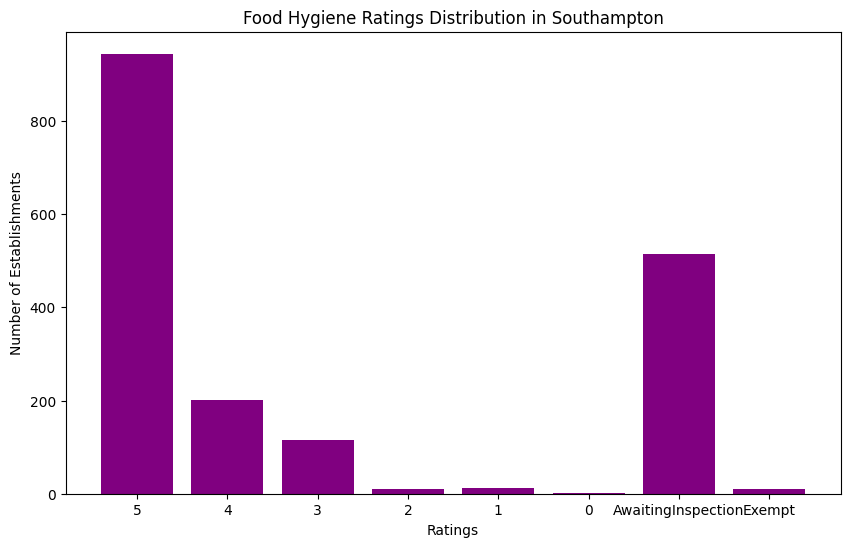

Worst Rated Establishments:
Balti House - Address: 36 Windrush Road, Southampton


In [34]:
    ratings = aggregate_ratings(establishments)
    plot_rating_distribution(ratings, "Food Hygiene Ratings Distribution in Southampton")
    report_worst_establishments(establishments)